In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.coordinates import Distance
import mpld3
mpld3.enable_notebook()

/Users/Meredith/Applications/Ureka/variants/common/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
infile = 'RGEB_distinfo.txt'
target_col = 0
RA_col = 3
Dec_col = 4
dist_col = 6
derr_col = 7
usecols = (target_col, RA_col, Dec_col, dist_col, derr_col)

# Read in target information from a text file
targets, RAs, Decs, dists, derrs = np.loadtxt(infile, comments='#', usecols=usecols, 
    dtype={'names': ('targets', 'RAs', 'Decs', 'dists', 'derrs'),
    'formats': (np.int, '|S11','|S11', np.float64, np.float64)}, unpack=True)

# Put the RAs, Decs, and distances in a more useful format
RAs = coord.Angle(RAs, unit=u.hour)
RAs_plot = RAs.wrap_at(180*u.degree) # for reasons
Decs = coord.Angle(Decs, unit=u.degree)
dists = dists*u.pc
derrs = derrs*u.pc

# Define a SkyCoord object for each target
starlocs = []
for target, RA, Dec, dist, derr in zip(targets, RAs, Decs, dists, derrs):
    starlocs.append( SkyCoord(ra=RA, dec=Dec, distance=dist) )

<IPython.core.display.Javascript object>


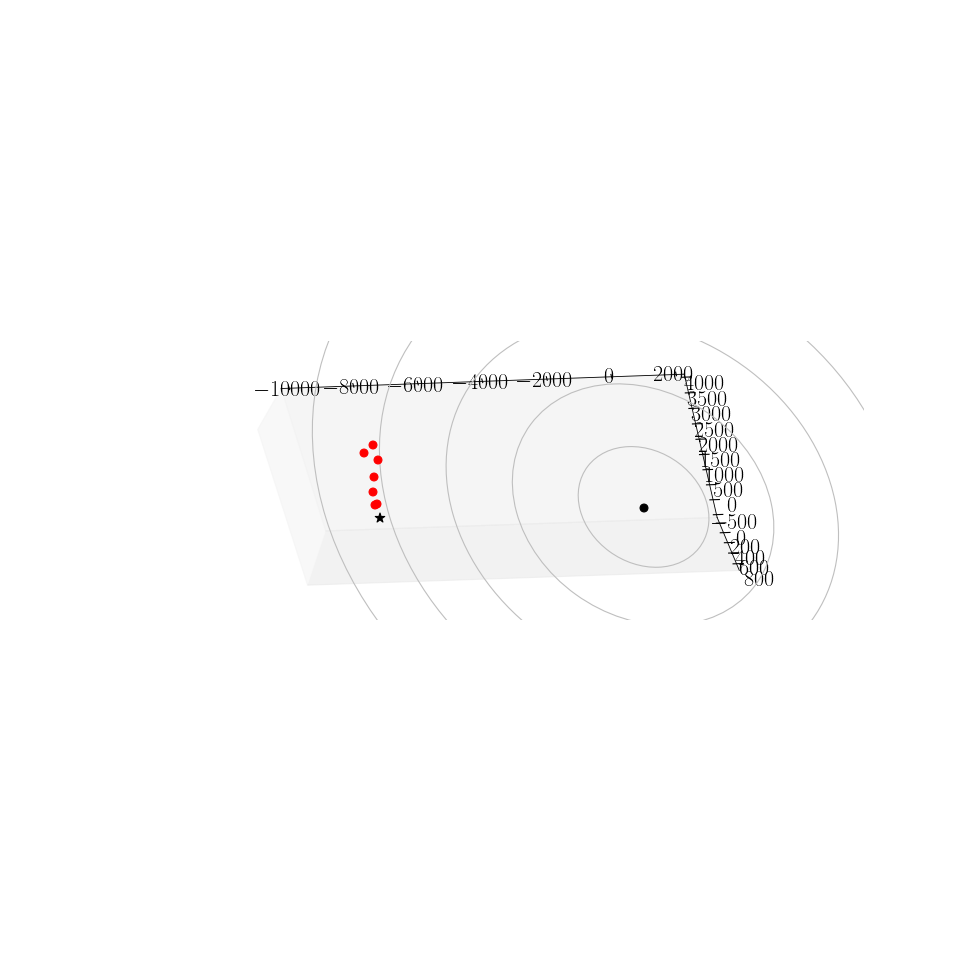

/Users/Meredith/Applications/Ureka/variants/common/lib/python2.7/site-packages/astropy/coordinates/builtin_frames/galactocentric.py:173: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xyz = R.dot(xyz.reshape(xyz.shape[0], np.prod(xyz.shape[1:]))).reshape(orig_shape)
/Users/Meredith/Applications/Ureka/variants/common/lib/python2.7/site-packages/astropy/coordinates/builtin_frames/galactocentric.py:181: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xyz = R.dot(xyz.reshape(xyz.shape[0], np.prod(xyz.shape[1:]))).reshape(orig_shape)
/Users/Meredith/Applications/Ureka/variants/common/lib/python2.7/site-packages/astropy/coordinates/builtin_frames/galactocentric.py:173: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xyz = R.dot(xyz.reshape(xyz.shape[0], np.prod(xyz.shape[1:]))).reshape(orig_shape)
/Users/Meredi

In [3]:
# Make a figure
fig = plt.figure()

star_galcens = []
for star in starlocs:
    if star.distance > 0:
        star_galcens.append(star.transform_to(coord.Galactocentric))

ax1 = fig.add_subplot(1,1,1, projection='3d', aspect='equal')
ax1.grid(False)
for star in star_galcens:
    ax1.scatter(star.x, star.y, star.z, c='r', edgecolors='r', s=50)
ax1.scatter(0, 0, 0, marker='o', c='k', edgecolors='k', s=50) # galactic center
ax1.scatter(-8300, 0, 27, marker='*', c='k', edgecolors='k', s=80) # Sun

# Contour-type circles that radiate out from the galactic center for reference
circle1 = plt.Circle((0,0), 2000, color='0.75', fill=False)
circle2 = plt.Circle((0,0), 4000, color='0.75', fill=False)
circle3 = plt.Circle((0,0), 6000, color='0.75', fill=False)
circle4 = plt.Circle((0,0), 8000, color='0.75', fill=False)
circle5 = plt.Circle((0,0), 10000, color='0.75', fill=False)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.add_patch(circle4)
ax1.add_patch(circle5)
art3d.pathpatch_2d_to_3d(circle1, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle2, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle3, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle4, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle5, z=0, zdir='z')